Abrimos el DataFrame

In [3]:
import pandas as pd

df = pd.read_csv('../Data/chess_numeric.csv')

In [2]:
df.describe()

,game_order,event,result,white_elo,white_rating_diff,black_elo,black_rating_diff,winner_loser_elo_diff,eco,termination,variant,ply_count
count,1.474939e+06,1.474939e+06,1.474939e+06,1.474939e+06,1.474939e+06,1.474939e+06,1.474939e+06,1.474939e+06,1.474939e+06,1.474939e+06,1.474939e+06,1.474939e+06
mean,2.274124e+04,9.028014e-01,3.375733e-02,1.668159e+03,1.800658e-01,1.668128e+03,-3.612699e-01,2.768299e+01,1.578036e+02,6.679571e-01,7.254666e-01,6.613308e+01
std,1.556069e+04,2.962281e-01,9.845103e-01,3.475049e+02,1.643002e+01,3.475649e+02,1.587403e+01,1.194292e+02,1.101773e+02,4.709464e-01,8.538936e-01,3.023767e+01
min,1.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+02,-6.600000e+02,6.000000e+02,-6.460000e+02,-1.594000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,8.384000e+03,1.000000e+00,-1.000000e+00,1.418000e+03,-6.000000e+00,1.417000e+03,-6.000000e+00,-2.500000e+01,4.900000e+01,0.000000e+00,0.000000e+00,4.500000e+01
50%,2.230000e+04,1.000000e+00,1.000000e+00,1.670000e+03,1.000000e+00,1.670000e+03,-1.000000e+00,8.000000e+00,1.300000e+02,1.000000e+00,1.000000e+00,6.200000e+01
75%,3.621500e+04,1.000000e+00,1.000000e+00,1.914000e+03,6.000000e+00,1.914000e+03,6.000000e+00,6.300000e+01,2.440000e+02,1.000000e+00,1.000000e+00,8.400000e+01
max,6.119700e+04,1.000000e+00,1.000000e+00,3.327000e+03,6.900000e+02,3.328000e+03,6.690000e+02,1.249000e+03,4.990000e+02,1.000000e+00,4.000000e+00,3.190000e+02


Observamos un registro estándar del mismo

In [2]:
df.iloc[0]

game_order                  1
event                       0
result                     -1
white_elo                1696
white_rating_diff         -10
black_elo                1696
black_rating_diff           7
winner_loser_elo_diff       0
eco                       200
termination                 1
variant                     2
ply_count                 118
Name: 0, dtype: int64

A continuación realizaremos un histograma de frecuencias para ver la distribución de elo de los jugadores que jugaron blancas.

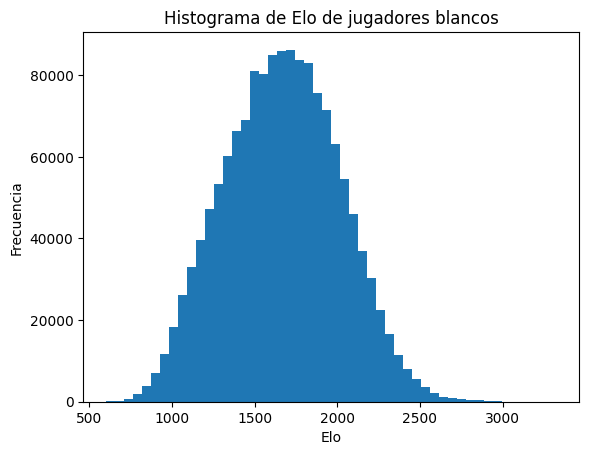

In [3]:
import matplotlib.pyplot as plt
plt.hist(df['white_elo'], bins=50)
plt.xlabel('Elo') 
plt.ylabel('Frecuencia')
plt.title('Histograma de Elo de jugadores blancos')
plt.show()

Podemos ver que la distribución es normal leptocúrtica y con una leve asimetría positiva.

A continuación veremos cómo funciona el algoritmo de match-making a partir de la correlación entre los elos de jugadores en blancas y negras.

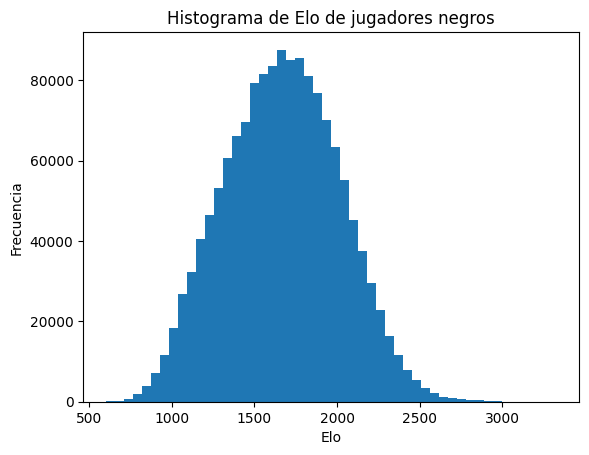

In [4]:
import matplotlib.pyplot as plt
plt.hist(df['black_elo'], bins=50)
plt.xlabel('Elo') 
plt.ylabel('Frecuencia')
plt.title('Histograma de Elo de jugadores negros')
plt.show()

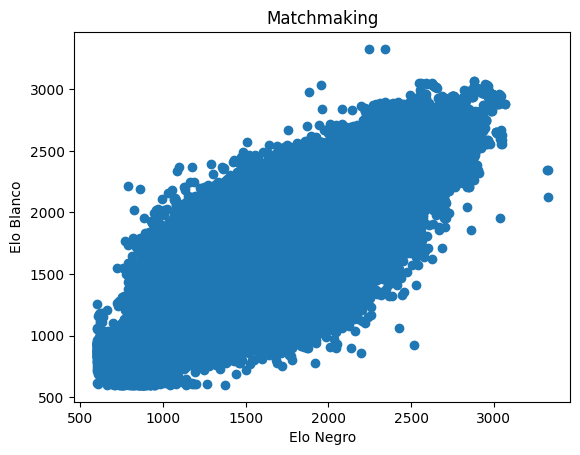

In [7]:
import matplotlib.pyplot as plt

elo_blanco = df['white_elo']
plt.scatter(elo_blanco, df['black_elo'])
plt.title("Matchmaking")
plt.xlabel("Elo Negro")
plt.ylabel("Elo Blanco")
plt.show()

In [6]:
from sklearn import linear_model
import numpy as np

#Paso 1: Instanciar/Crear el modelo
regr = linear_model.LinearRegression()
elo_negro = df[["black_elo"]]
#Paso 2: Entrenar el modelo
regr.fit(elo_negro, elo_blanco)

beta_1 = regr.coef_
beta_1 = beta_1[0]
beta_0 = regr.intercept_

In [8]:
un_elo = df.loc[df['game_order'] == 1, 'white_elo']
un_elo = un_elo.values[0]

In [9]:
y = beta_0 + beta_1 * un_elo

In [10]:
y_pred = regr.predict(elo_negro)

In [11]:
from sklearn.metrics import r2_score
r2 = r2_score(elo_blanco, y_pred)
r2

0.875751429254187

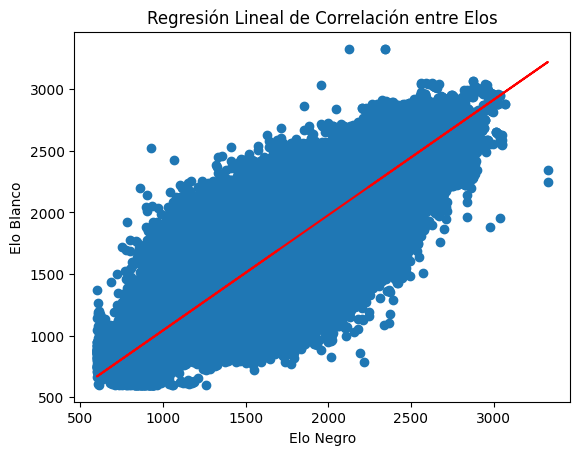

In [12]:
plt.scatter(elo_negro, elo_blanco)
plt.plot(elo_negro, y_pred, 'r')
plt.xlabel('Elo Negro')
plt.ylabel('Elo Blanco')
plt.title("Regresión Lineal de Correlación entre Elos")
plt.show()

In [13]:
elo_negro.insert(1, "elo_value_pred", y_pred)
elo_negro

,black_elo,elo_value_pred
0,1696,1694.237285
1,1630,1632.484108
2,2080,2053.528497
3,2096,2068.498964
4,1722,1718.564294
...,...,...
1474934,1677,1676.459855
1474935,1079,1116.938645
1474936,1263,1289.099017
1474937,1130,1164.657009
